In [3]:
!pip3 install theano

In [7]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.


## Importing the required libraries

In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [9]:
print('kevin')

kevin


In [10]:
from keras import regularizers

In [236]:
import pyaudio

ModuleNotFoundError: No module named 'pyaudio'

In [237]:
import os

In [238]:
mylist= os.listdir('../../Datasets/Raw_Dataset')
mylist

['03-01-01-01-01-01-01.wav',
 '03-01-01-01-01-01-02.wav',
 '03-01-01-01-01-01-03.wav',
 '03-01-01-01-01-01-04.wav',
 '03-01-01-01-01-01-05.wav',
 '03-01-01-01-01-01-06.wav',
 '03-01-01-01-01-01-07.wav',
 '03-01-01-01-01-01-08.wav',
 '03-01-01-01-01-01-09.wav',
 '03-01-01-01-01-01-10.wav',
 '03-01-01-01-01-01-11.wav',
 '03-01-01-01-01-01-12.wav',
 '03-01-01-01-01-01-13.wav',
 '03-01-01-01-01-01-14.wav',
 '03-01-01-01-01-01-15.wav',
 '03-01-01-01-01-01-16.wav',
 '03-01-01-01-01-01-17.wav',
 '03-01-01-01-01-01-18.wav',
 '03-01-01-01-01-01-19.wav',
 '03-01-01-01-01-01-20.wav',
 '03-01-01-01-01-01-21.wav',
 '03-01-01-01-01-01-22.wav',
 '03-01-01-01-01-01-23.wav',
 '03-01-01-01-01-01-24.wav',
 '03-01-01-01-01-02-01.wav',
 '03-01-01-01-01-02-02.wav',
 '03-01-01-01-01-02-03.wav',
 '03-01-01-01-01-02-04.wav',
 '03-01-01-01-01-02-05.wav',
 '03-01-01-01-01-02-06.wav',
 '03-01-01-01-01-02-07.wav',
 '03-01-01-01-01-02-08.wav',
 '03-01-01-01-01-02-09.wav',
 '03-01-01-01-01-02-10.wav',
 '03-01-01-01-

In [239]:
type(mylist)

list

In [240]:
print(mylist[1400])

03-01-08-02-02-01-09.wav


In [241]:
print(mylist[400][6:-16])

03


## Plotting the audio file's waveform and its spectrogram

In [242]:
data, sampling_rate = librosa.load('../../Raw_Dataset/03-01-01-01-01-01-01.wav')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\i870871\\Desktop\\Emotion detection\\Raw_Dataset\\03-01-01-01-01-01-01.wav'

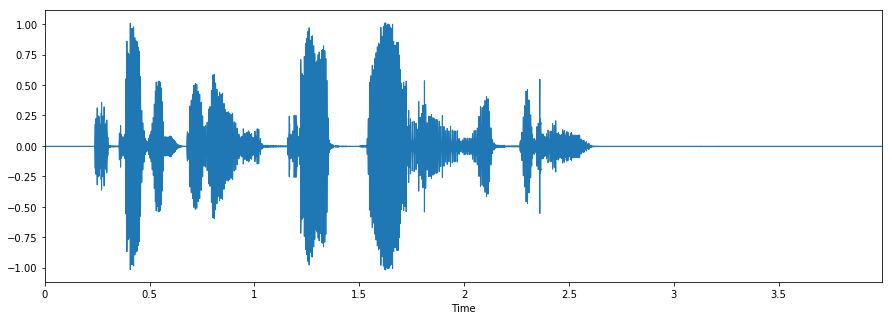

In [243]:
#% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [244]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('../../Raw_Dataset/03-01-01-01-01-01-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../Raw_Dataset/03-01-01-01-01-01-01.wav'

## Setting the labels

In [245]:
feeling_list=[]
my_new_list=[]
#print(mylist[140][6:8])
#int(mylist[140][18:20]) /2  
'''for i in mylist:
    if(i[6:8]=='02' and int(i[18:20])%2==1):
        feeling_list.append('male_calm')
        my_new_list.append(i)
    elif(i[6:8]=='02' and int(i[18:20])%2==0):
        feeling_list.append('female_calm')
        my_new_list.append(i)
    elif(i[6:8]=='03' and int(i[18:20])%2==1):
        feeling_list.append('male_happy')
        my_new_list.append(i)
    elif(i[6:8]=='03' and int(i[18:20])%2==0):
        feeling_list.append('female_happy')
        my_new_list.append(i)
    elif(i[6:8]=='04' and int(i[18:20])%2==1):
        feeling_list.append('male_sad')
        my_new_list.append(i)
    elif(i[6:8]=='04' and int(i[18:20])%2==0):
        feeling_list.append('female_sad')
        my_new_list.append(i)
    elif(i[6:8]=='05' and int(i[18:20])%2==1):
        feeling_list.append('male_angry')
        my_new_list.append(i)
    elif(i[6:8]=='05' and int(i[18:20])%2==0):
        feeling_list.append('female_angry')
        my_new_list.append(i)
    elif(i[6:8]=='06' and int(i[18:20])%2==1):
        feeling_list.append('male_fearful')
        my_new_list.append(i)
    elif(i[6:8]=='06' and int(i[18:20])%2==0):
        feeling_list.append('female_fearful')
        my_new_list.append(i)
'''
for i in mylist:
    if(int(i[18:20])%2==1):
        feeling_list.append('male')
        #my_new_list.append(i)
    elif(int(i[18:20])%2==0):
        feeling_list.append('female')
        #my_new_list.append(i)

    

In [246]:
'''mylist=my_new_list
len(mylist)
'''
len(mylist)

1440

In [247]:
print(mylist[951],feeling_list[951])

03-01-06-01-02-02-16.wav female


In [248]:
labels = pd.DataFrame(feeling_list)

In [249]:
labels[:10]

,0
0,male
1,female
2,male
3,female
4,male
5,female
6,male
7,female
8,male
9,female


## Getting the features of audio files using librosa

In [250]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
c=0
for file in mylist:
    print(c)
    c+=1
    X, sample_rate = librosa.load('../../Datasets/Raw_Dataset/'+file, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    feature = mfccs
    #[float(i) for i in feature]
    #feature1=feature[:135]
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1

In [251]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [252]:
newdf = pd.concat([df3,labels], axis=1)

In [253]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [254]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,-65.800971,...,-62.295248,-64.930130,-65.332128,-64.116934,-64.319911,-64.971422,-63.155779,-64.178668,-63.061902,male
1,-63.214204,-63.214204,-63.214204,-63.214204,-63.214204,-63.167273,-63.385486,-63.461856,-63.336160,-63.204256,...,-53.428584,-53.139486,-52.853875,-55.247733,-57.681998,-57.166072,-57.039674,-56.066060,-58.502809,female
2,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,-60.258650,...,-50.511304,-49.081509,-47.701069,-48.794907,-52.423779,-54.827965,-52.233280,-49.625140,-48.974823,male
3,-66.488087,-66.488087,-66.488087,-66.488087,-66.488087,-66.488087,-66.526982,-66.554370,-66.534395,-66.488087,...,-62.121766,-64.443918,-65.315325,-65.285077,-65.365458,-64.970735,-64.157288,-64.912971,-66.488087,female
4,-60.262445,-60.367622,-64.739047,-66.271230,-61.207477,-60.241174,-62.637524,-63.144472,-60.526856,-59.101800,...,-54.735956,-50.871346,-51.928354,-56.388860,-57.152922,-54.602237,-54.803893,-60.359017,-64.784380,male


In [255]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
87,-61.870145,-61.870145,-61.870145,-61.870145,-61.870145,-61.870145,-61.870145,-61.870145,-61.870145,-61.870145,...,-56.265393,-53.987556,-54.553441,-53.876998,-53.254038,-55.180381,-54.410851,-52.896295,-58.102042,female
525,-58.529230,-58.099550,-57.889211,-58.004997,-57.754546,-56.623669,-55.128218,-53.701520,-54.891047,-55.263517,...,-53.670559,-53.047828,-51.909910,-53.678963,-55.203672,-54.431516,-54.877563,-56.293732,-57.557219,female
264,-70.746514,-70.746514,-70.025286,-69.131263,-70.746514,-70.746514,-70.746514,-70.746514,-70.746514,-70.746514,...,-32.430043,-32.474731,-34.334454,-38.280955,-39.110355,-41.010279,-40.282721,-41.454053,-44.383208,male
469,-49.293989,-49.293989,-49.293989,-49.293989,-49.293989,-49.293989,-49.901525,-47.674548,-47.494465,-48.012449,...,-48.483345,-47.690676,-47.637388,-48.026478,-46.827870,-46.361959,-47.048227,-46.011453,-46.312946,female
1346,-54.381010,-54.381010,-54.381010,-54.381010,-54.381010,-54.381010,-54.381010,-54.381010,-54.381010,-54.199751,...,-52.160135,-52.773777,-51.492674,-53.047790,-53.344335,-53.515057,-52.464441,-53.100694,-52.297329,male
78,-63.854800,-63.801467,-64.129510,-66.956307,-67.988996,-68.293849,-68.046466,-62.575464,-60.731202,-65.709564,...,-37.431195,-39.257085,-39.906521,-40.456235,-41.963326,-44.468985,-46.577826,-49.089921,-51.692268,male
654,-57.983965,-58.129757,-57.216111,-57.138616,-58.032113,-57.584437,-57.990391,-57.497483,-57.414894,-58.088535,...,-39.392082,-40.890291,-42.336407,-43.509533,-42.348652,-42.181487,-45.076798,-45.154829,-39.698874,male
1033,-42.678730,-44.413292,-45.615693,-45.763545,-45.777705,-45.657712,-45.466905,-45.282896,-46.342439,-45.951859,...,-48.487528,-48.629278,-49.366367,-49.220289,-49.220289,-49.220289,-49.220289,-49.220289,-49.220289,female
1039,-44.197815,-42.662703,-43.445848,-45.387782,-44.434828,-43.057281,-43.248149,-43.550603,-43.661064,-44.124850,...,-43.998890,-43.823575,-43.495731,-44.200462,-42.733766,-42.432236,-42.434950,-42.711147,-43.409643,female
3,-66.488087,-66.488087,-66.488087,-66.488087,-66.488087,-66.488087,-66.526982,-66.554370,-66.534395,-66.488087,...,-62.121766,-64.443918,-65.315325,-65.285077,-65.365458,-64.970735,-64.157288,-64.912971,-66.488087,female


In [256]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [257]:
newdf1 = np.random.rand(len(rnewdf)) < 0.9
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [258]:
train.shape

(1301, 217)

In [259]:
trainfeatures = train.iloc[:, :-1]

In [260]:
trainlabel = train.iloc[:, -1:]

In [261]:
testfeatures = test.iloc[:, :-1]

In [262]:
testlabel = test.iloc[:, -1:]

In [263]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


In [264]:
y_train.shape

(1301, 2)

In [265]:
X_test.shape

(139, 216)

## Changing dimension for CNN model

In [266]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [267]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [268]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 216, 256)          1536      
_________________________________________________________________
activation_16 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_17 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 27, 128)           82048     
__________

In [269]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [270]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=20, validation_data=(x_testcnn, y_test))

Train on 1301 samples, validate on 139 samples
Epoch 1/1
1301/1301 [==============================] - 10s 8ms/step - loss: 8.0212 - acc: 0.4981 - val_loss: 8.2330 - val_acc: 0.4892


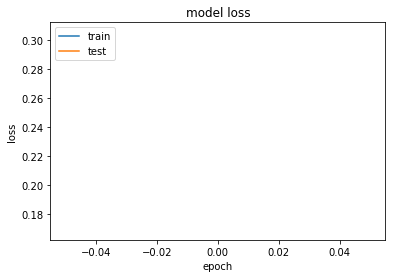

In [157]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [158]:
model.evaluate(x_testcnn, y_test, verbose=0)

[0.3051428993542989, 0.9236111111111112]

## Saving the model

In [159]:
model_name = 'Gender_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\i870871\Desktop\Emotion detection\Emotion GitHub\Speech-Emotion-Analyzer-master\saved_models\Gender_Voice_Detection_Model.h5 


In [160]:
import json
model_json = model.to_json()
with open("gender_model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [23]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('gender_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Gender_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


## Predicting emotions on the test data

In [24]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

NameError: name 'x_testcnn' is not defined

In [163]:
preds

array([[9.85019207e-01, 1.49807166e-02],
       [6.32999092e-02, 9.36700046e-01],
       [9.58689511e-01, 4.13105264e-02],
       [9.99702275e-01, 2.97691266e-04],
       [9.96857285e-01, 3.14271194e-03],
       [7.62938559e-01, 2.37061396e-01],
       [9.93612707e-01, 6.38735900e-03],
       [9.20310199e-01, 7.96898603e-02],
       [9.83647525e-01, 1.63524803e-02],
       [3.87760699e-01, 6.12239301e-01],
       [9.56960559e-01, 4.30394523e-02],
       [9.93229032e-01, 6.77092746e-03],
       [9.67884302e-01, 3.21156792e-02],
       [2.92951451e-03, 9.97070432e-01],
       [8.12625766e-01, 1.87374264e-01],
       [9.98313546e-01, 1.68648094e-03],
       [9.88434434e-01, 1.15655223e-02],
       [3.91538560e-01, 6.08461440e-01],
       [9.87385988e-01, 1.26140956e-02],
       [2.28015915e-01, 7.71984041e-01],
       [9.97807562e-01, 2.19239178e-03],
       [4.39669080e-02, 9.56033051e-01],
       [9.72114027e-01, 2.78860182e-02],
       [8.79709959e-01, 1.20290004e-01],
       [4.986305

In [164]:
preds1=preds.argmax(axis=1)

In [165]:
preds1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [166]:
abc = preds1.astype(int).flatten()

In [118]:
predictions = (lb.inverse_transform((abc)))

In [119]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_calm
1,male_sad
2,male_fearful
3,female_calm
4,male_fearful
5,male_happy
6,female_calm
7,female_fearful
8,male_angry
9,male_happy


In [120]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [121]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_calm
1,male_sad
2,male_fearful
3,female_fearful
4,male_fearful
5,male_happy
6,female_calm
7,female_angry
8,male_angry
9,male_happy


In [122]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [128]:
finaldf[170:180]

,actualvalues,predictedvalues
170,female_fearful,female_fearful
171,male_angry,male_angry
172,male_fearful,male_fearful
173,male_happy,male_happy
174,female_happy,female_happy
175,female_angry,female_angry
176,female_angry,female_sad
177,male_sad,male_calm
178,male_angry,male_calm
179,male_sad,male_sad


In [129]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,21
female_calm,20
female_fearful,19
female_happy,17
female_sad,20
male_angry,55
male_calm,25
male_fearful,55
male_happy,49


In [130]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,25
female_calm,22
female_fearful,19
female_happy,9
female_sad,25
male_angry,51
male_calm,29
male_fearful,51
male_happy,50


In [131]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [15]:
data, sampling_rate = librosa.load('audio.wav')

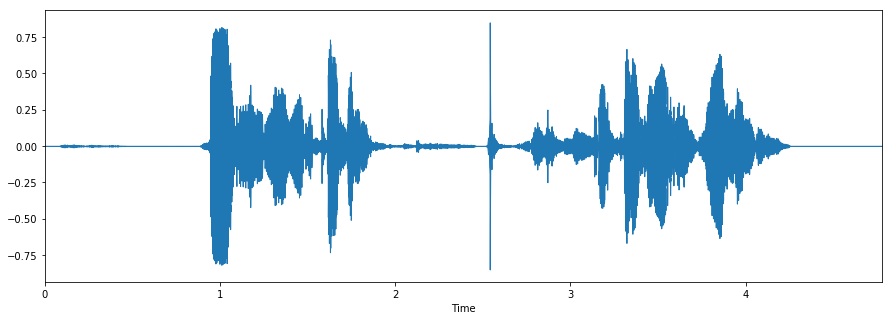

In [16]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [17]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [18]:
livedf2= pd.DataFrame(data=livedf2)

In [19]:
livedf2 = livedf2.stack().to_frame().T

In [20]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-50.566361,-50.801072,-52.240208,-50.319145,-47.955919,-47.67377,-50.878927,-50.177818,-50.954402,-53.328094,...,-28.087083,-31.406289,-33.492022,-32.606256,-31.653282,-31.121518,-31.481734,-29.16543,-25.407647,-21.827217


In [21]:
twodim= np.expand_dims(livedf2, axis=2)

In [25]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 63ms/step


In [26]:
livepreds

array([[0.02916333, 0.97083676]], dtype=float32)

In [27]:
livepreds1=livepreds.argmax(axis=1)

In [28]:
liveabc = livepreds1.astype(int).flatten()

In [31]:
dict_gender[liveabc[0]]

'male'

In [231]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male'], dtype=object)

In [30]:
dict_gender={0:'female',1:'male'}